<a href="https://colab.research.google.com/github/mzkhan2000/AEMO-data-Analytics/blob/main/1_Visualization_GAThemes_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dynamic Categorization Enhancement Framework for Heterogeneous Data Objects to Improve Data Discoverability** - by ABM Moniruzzaman

**This is one module for the extraction of GA-Themes Title Description using SPARQL on GA_data**

In [1]:
!pip install rdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 5.2 MB/s 
     |████████████████████████████████| 41 kB 636 kB/s 


In [2]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
from rdflib import Graph, URIRef, Namespace

In [4]:
# Moniruzzaman
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [5]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# check out if google dride mount suceessful 
!ls "/content/drive/My Drive/Datasets4colab_Monir/GA_repo"

compositioncategory.rdf  ga-records-large.ttl  output-ga-records.ttl
GA_all1K_data.txt	 ga-records.ttl        valuequalifier.rdf
GA_Dataframe.csv	 Gravity_DBpedia.txt


Loading GA repository as a RDF graph. It may takes few minutes to complete

In [8]:
g = Graph()
g.parse("/content/drive/My Drive/Datasets4colab_Monir/GA_repo/ga-records-large.ttl")

<Graph identifier=N043502bf2728470ca8f337c475eedd22 (<class 'rdflib.graph.Graph'>)>

Loading external knowladge base embeddings. It may takes several minutes to complete

In [9]:
GoogleNews = "/content/drive/My Drive/Datasets4colab_Monir/Pre-trained_Model/GoogleNews-vectors-negative300.bin"
GoogleNews_model = KeyedVectors.load_word2vec_format(GoogleNews, binary=True)

In [10]:
# a funtion for ga-themes extraction from GA-rdf repository separate and return a list all the ga-themes - Monir
def gaThemesExtraction(ga_record):
  gaThemes = []
  with open(ga_record, 'rt') as f:
    data = f.readlines()
  for line in data:
      # check if line contains "ga-themes" sub-string
      if line.__contains__('ga-themes'):
          # split the line contains from "ga-themes" sub-string
          stringTemp = line.split("ga-themes/",1)[1]
          # further split the line contains from "ga-themes" sub-string to delimiter
          stringTemp = stringTemp.split('>')[0]
          gaThemes.append(stringTemp)
  #print(dataLog)
  #print(gaThemes[:9])
  #print(len(gaThemes))
  return gaThemes

In [11]:
# a SPARQL query for ga-themes extraction from GA-rdf repository separate and return a list all the ga-themes - Monir

all_records = []

# Query the data in g using SPARQL
results = g.query(
    """
PREFIX        agr: <http://data.surroundaustralia.com/def/agr#>
PREFIX record_pre: <http://example.com/record/>
PREFIX classifier: <http://data.surroundaustralia.com/def/agr#>
PREFIX ga-themes: <http://example.org/def/ga-themes/>

SELECT DISTINCT ?s WHERE { 
                              ?s a classifier:Record 
                              }
    """ )

for row in results:
    all_records.append(row.s) 

**The following three code blocks extract the ga-themes using a list of SPARQL ies from GA-rdf repository - Monir**

The following code of block takes several minutes to complete the process
a function using SPARQL query for ga-themes extraction from GA-rdf repository separate and return a list all the ga-themes - Monir

It may takes several minutes to complete because the this is a large-scale rdf graph

In [12]:
# a SPARQL query for ga-themes extraction from GA-rdf repository separate and return a list all the ga-themes - Monir

gaThemes =[]
record = all_records
for line in record:
    if line.__contains__('record'):
        #print(line)  
        stringTemp = line.split("record/",1)[1]
        stringTemp = stringTemp.split('>')[0]
        #record_num.append(stringTemp)
    # Query the data in g using SPARQL
    results = g.query(
        """
        PREFIX Classifier_arg: <http://data.surroundaustralia.com/def/agr#> 
        PREFIX record_pre: <http://example.com/record/>

        SELECT DISTINCT ?o WHERE { record_pre:""" + stringTemp + """  Classifier_arg:hasClassifier ?o }
          """)
    
    for row in results:
        # append object in row of the SPARQL query results 
        gaThemes.append(row.o) 

print(len(gaThemes))
print(gaThemes[0])

80319
http://example.org/def/ga-themes/magnetics


In [13]:
# filter out non-thematic_concept such as vocabulary - Monir
# make a list of unique ga-themes

thematic_concept = []
all_gaThemes = []
all_unique_gaThemes = []
unique_thematic_concept = []
ga_themes_header = 'http://example.org/def/ga-themes/'
# check if line contains "ga-themes" sub-string    
for line in gaThemes:
      # check if line contains "ga-themes" sub-string
      if line.__contains__('ga-themes'):
          # split the line contains from "ga-themes" sub-string
          stringTemp = line.split("ga-themes/",1)[1]
          # further split the line contains from "ga-themes" sub-string to delimiter
          stringTemp = stringTemp.split('>')[0]
          thematic_concept.append(stringTemp)
          all_gaThemes.append(gaThemes)

# Mapping with the model 
thematic_concept_mapping_model = GoogleNews_model
# find a list of unique ga-themes
thematic_concept = list(dict.fromkeys(thematic_concept))
for line in thematic_concept:
  # if line.lower() in words or not line.isalpha():
  if line in thematic_concept_mapping_model.key_to_index:
    if not line.__contains__('-'):
      if not line.__contains__('/'):
        if not line.__contains__('.'):
          if not line.__contains__('*'):
            if not line.__contains__('@'):
              if not any(chr.isdigit() for chr in line):
                unique_thematic_concept.append(line)

for theme in unique_thematic_concept:
  theme = ga_themes_header + theme
  all_unique_gaThemes.append(theme)
all_unique_gaThemes
#print(unique_thematic_concept)
#print(len(unique_thematic_concept))

['http://example.org/def/ga-themes/magnetics',
 'http://example.org/def/ga-themes/topography',
 'http://example.org/def/ga-themes/thorium',
 'http://example.org/def/ga-themes/radiometrics',
 'http://example.org/def/ga-themes/gravity',
 'http://example.org/def/ga-themes/hydrogeology',
 'http://example.org/def/ga-themes/groundwater',
 'http://example.org/def/ga-themes/commodities',
 'http://example.org/def/ga-themes/prospectivity',
 'http://example.org/def/ga-themes/geodesy',
 'http://example.org/def/ga-themes/dataset',
 'http://example.org/def/ga-themes/marine',
 'http://example.org/def/ga-themes/seabed',
 'http://example.org/def/ga-themes/geochemistry',
 'http://example.org/def/ga-themes/seismics',
 'http://example.org/def/ga-themes/stratigraphy',
 'http://example.org/def/ga-themes/ore',
 'http://example.org/def/ga-themes/geology',
 'http://example.org/def/ga-themes/potassium',
 'http://example.org/def/ga-themes/antarctica',
 'http://example.org/def/ga-themes/geomorphology',
 'http://e

In [15]:
print('Total number of unique GA themes for mapping: ', len(all_unique_gaThemes))

Total number of unique GA themes for mapping:  207


**The following code block find all the record data using a SPARQL query for each of the ga-themes from GA-rdf repository - Monir**

The following code of block takes several minutes to complete the process

In [23]:
# a SPARQL query for find all the record data for each of the ga-themes from GA-rdf repository separate and return a list all the ga-themes - Monir
# new_classifier = ['magnetics', 'topography', 'thorium', 'gravity', 'hydrogeology', 'geodesy', 'marine', 'geochemistry', 'stratigraphy']
new_classifier = unique_thematic_concept
all_record = []
# for loop with queries
for obj in new_classifier:
  # Query the data in g using SPARQL
  # Query the data in g using SPARQL
  results = g.query(
      """
  PREFIX        agr: <http://data.surroundaustralia.com/def/agr#>
  PREFIX record_pre: <http://example.com/record/>
  PREFIX classifier: <http://data.surroundaustralia.com/def/agr#>
  PREFIX ga-themes: <http://example.org/def/ga-themes/>

  SELECT DISTINCT ?s WHERE { 
    ?s a classifier:Record; 
    classifier:hasClassifier ga-themes:""" + obj + """ 
    } """ 
    )

  record = []
  #pos = new_classifier.index(obj)

  for row in results:
      # print(f"{row.s}")
      record.append(row.s) 
  all_record.append(record)
#all_record_all_classifier.append(all_record)

In [ ]:
#for i in range(len(all_record)):
  #print(unique_thematic_concept[i], " : ", len(all_record[i]))

**The following code block find all the record data titles and the record data descriptions using two SPARQL queries for each of the ga-themes from GA-rdf repository - Monir**

The following code of block takes several minutes to complete the process

In [120]:
# initialize list for the titles of each record
record_title_all_allThemes = []
# initialize list for the descriptions of each record
record_description_all_allThemes = []

# for loop with queries for each of the unique_thematic_concept
for i in range(len(all_record)):
  record_title_all = []
  record_description_all = []
  for line in all_record[i]:
      if line.__contains__('record'):
          #print(line)  
          stringTemp = line.split("record/",1)[1]
          stringTemp = stringTemp.split('>')[0]
          #record_num.append(stringTemp)
      # Query the data in g using SPARQL
      results = g.query(
          """
          PREFIX ns1: <http://purl.org/dc/terms/> 
          PREFIX record_pre: <http://example.com/record/>

          SELECT DISTINCT ?o WHERE { record_pre:""" + stringTemp + """  ns1:title ?o }
            """)
      
      # Query the data in g using SPARQL
      results2 = g.query(
          """
          PREFIX ns1: <http://purl.org/dc/terms/> 
          PREFIX record_pre: <http://example.com/record/>

          SELECT DISTINCT ?o WHERE { record_pre:""" + stringTemp + """  ns1:description ?o }
            """)
      # pos = new_classifier.index(obj)
      # all_record.append(results)
      record_title = []
      record_description = []

      for row in results:
        record_title.append(row.o)
      record_title_all.append(record_title) 
      
      for row2 in results2:
        record_description.append(row2.o)
      record_description_all.append(record_description)

  # all record titles for each of the themes are appended from the results    
  record_title_all_allThemes.append(record_title_all)
  # all record description for each of the themes are appended from the results 
  record_description_all_allThemes.append(record_description_all)

In [121]:
# this code block is for visulization and test purposes only 
print(len(record_title_all_allThemes))
print('Number of record tiles found for the theme', all_unique_gaThemes[0], ' : ', len(record_title_all_allThemes[0]))
print('Number of record tiles found for the theme', all_unique_gaThemes[1], ' : ', len(record_title_all_allThemes[1]))
print('Number of record tiles found for the theme', all_unique_gaThemes[2], ' : ', len(record_title_all_allThemes[2]))
print('-------------------------------------------------------------------------------------------------------------')
print('1st ten record tiles found for the theme', all_unique_gaThemes[0],)
print('-------------------------------------------------------------------------------------------------------------')
for title in record_title_all_allThemes[0][:10]:
  print(title)
print('-------------------------------------------------------------------------------------------------------------')
print('1st ten record tiles found for the theme', all_unique_gaThemes[1],)
print('-------------------------------------------------------------------------------------------------------------')
for title in record_title_all_allThemes[1][:10]:
  print(title)
print('-------------------------------------------------------------------------------------------------------------')
print('1st ten record tiles found for the theme', all_unique_gaThemes[2],)
print('-------------------------------------------------------------------------------------------------------------')
for title in record_title_all_allThemes[2][:10]:
  print(title)

207
Number of record tiles found for the theme http://example.org/def/ga-themes/magnetics  :  1067
Number of record tiles found for the theme http://example.org/def/ga-themes/topography  :  5452
Number of record tiles found for the theme http://example.org/def/ga-themes/thorium  :  637
-------------------------------------------------------------------------------------------------------------
1st ten record tiles found for the theme http://example.org/def/ga-themes/magnetics
-------------------------------------------------------------------------------------------------------------
[rdflib.term.Literal('Total Magnetic Intensity (TMI) grid of NSW DMR, Discovery 2000, 1994-95, Area D, Surat Basin survey')]
[rdflib.term.Literal('Total Magnetic Intensity (TMI) grid of Buchanan, NT, 2002 survey')]
[rdflib.term.Literal('Total Magnetic Intensity (TMI) grid of Rylstone, NSW, 1997 survey')]
[rdflib.term.Literal('Total Magnetic Intensity (TMI) grid of Robinson River, NT, 1996 survey')]
[rdflib

In [122]:
# this code block is for visulise and test purposes only 
print(len(record_description_all_allThemes))
print('Number of record tiles found for the theme', all_unique_gaThemes[0], ' : ', len(record_description_all_allThemes[0]))
print('Number of record tiles found for the theme', all_unique_gaThemes[1], ' : ', len(record_description_all_allThemes[1]))
print('Number of record tiles found for the theme', all_unique_gaThemes[2], ' : ', len(record_description_all_allThemes[2]))
print('-------------------------------------------------------------------------------------------------------------')
print('1st ten record tiles found for the theme', all_unique_gaThemes[0],)
print('-------------------------------------------------------------------------------------------------------------')
for description in record_description_all_allThemes[0][:10]:
  print(description)
print('-------------------------------------------------------------------------------------------------------------')
print('1st ten record tiles found for the theme', all_unique_gaThemes[1],)
print('-------------------------------------------------------------------------------------------------------------')
for description in record_description_all_allThemes[1][:10]:
  print(description)
print('-------------------------------------------------------------------------------------------------------------')
print('1st ten record tiles found for the theme', all_unique_gaThemes[2],)
print('-------------------------------------------------------------------------------------------------------------')
for description in record_description_all_allThemes[20][:10]:
  print(description)

207
Number of record tiles found for the theme http://example.org/def/ga-themes/magnetics  :  1067
Number of record tiles found for the theme http://example.org/def/ga-themes/topography  :  5452
Number of record tiles found for the theme http://example.org/def/ga-themes/thorium  :  637
-------------------------------------------------------------------------------------------------------------
1st ten record tiles found for the theme http://example.org/def/ga-themes/magnetics
-------------------------------------------------------------------------------------------------------------
[rdflib.term.Literal("Total magnetic intensity (TMI) data measures variations in the intensity of the Earth's magnetic field caused by the contrasting content of rock-forming minerals in the Earth crust. Magnetic anomalies can be either positive (field stronger than normal) or negative (field weaker) depending on the susceptibility of the rock. The data are processed via standard methods to ensure the resp

Next two code of blocks perform data preprocessing and joining list of text togather for tiles and descriptions.

In [125]:
# import module
import pandas as pd  

record_title_all_allThemes_joined = []
# join all the text from the feature_content list
# for loop with queries for each of the unique_thematic_concept
for i in range(len(record_title_all_allThemes)):
  record_title_list = record_title_all_allThemes[i]
  record_title_list2 = []
  for j in range(len(record_title_list)):
    all_temp_text1 = unique_thematic_concept[i] + ' ' + ' '.join(record_title_list[j])
    record_title_list2.append(all_temp_text1)
  # join all 
  all_temp_text2 = '. '.join(record_title_list2)
  record_title_all_allThemes_joined.append(all_temp_text2)


record_description_all_allThemes_joined = []
# join all the text from the feature_content list
# for loop with queries for each of the unique_thematic_concept
for i in range(len(record_description_all_allThemes)):
  record_description_list = record_description_all_allThemes[i]
  record_description_list2 = []
  for j in range(len(record_description_list)):
    all_temp_text1 = unique_thematic_concept[i] + ' ' + ' '.join(record_description_list[j])
    record_description_list2.append(all_temp_text1)
  # join all 
  all_temp_text2 = '. '.join(record_description_list2)
  record_description_all_allThemes_joined.append(all_temp_text2)

In [139]:
print(len(record_title_all_allThemes_joined))
#print(record_title_all_allThemes_joined[1])
print(len(record_description_all_allThemes_joined))
#print(record_description_all_allThemes_joined[1])

207
207


In [129]:
df = pd.DataFrame(list(zip(unique_thematic_concept, all_unique_gaThemes, record_title_all_allThemes_joined, record_description_all_allThemes_joined)),
                  columns =['Thematic_Concept', 'GAThemes', 'Record_Title', 'Record_description'])

In [130]:
print(df.head())

  Thematic_Concept                                       GAThemes  \
0        magnetics     http://example.org/def/ga-themes/magnetics   
1       topography    http://example.org/def/ga-themes/topography   
2          thorium       http://example.org/def/ga-themes/thorium   
3     radiometrics  http://example.org/def/ga-themes/radiometrics   
4          gravity       http://example.org/def/ga-themes/gravity   

                                        Record_Title  \
0  magnetics Total Magnetic Intensity (TMI) grid ...   
1  topography Warnga 1:50 000 topographic map. to...   
2  thorium Radiometric thorium equivalent grid of...   
3  radiometrics Radiometric thorium equivalent gr...   
4  gravity Gravity point located data of Alligato...   

                                  Record_description  
0  magnetics Total magnetic intensity (TMI) data ...  
1  topography Product Specifications Coverage: Pa...  
2  thorium The radiometric, or gamma-ray spectrom...  
3  radiometrics The radiomet

In [137]:
# check out if google dride mount suceessful 
!ls "/content/drive/My Drive/Datasets4colab_Monir/GA_repo"

compositioncategory.rdf  ga-records.ttl		valuequalifier.rdf
GA_all1K_data.txt	 Gravity_DBpedia.txt
ga-records-large.ttl	 output-ga-records.ttl


In [138]:
# df.to_csv(index=False)
df.to_csv('/content/drive/My Drive/Datasets4colab_Monir/GA_repo/GA_Dataframe.csv')

**Themes mapping to embedding model of external knowledge base and semantic similarity matching of each of the thematic concepts from Geoscience domain**

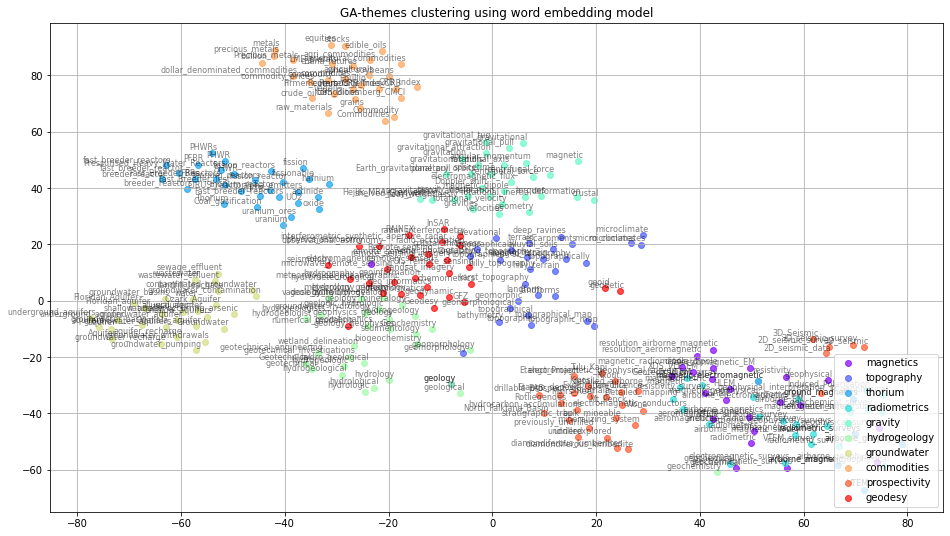

['airborne_EM', 'airborne_magnetic', 'XDS_VLF_EM', 'electromagnetic_geophysical_survey', 'radiometric', 'magnetic_radiometric', 'magnetic_electromagnetic', 'HLEM', 'geophysical', 'resistivity', 'electromagnetic_EM', 'ground_magnetics', 'CSAMT', 'resolution_airborne_magnetic', 'electromagnetics', 'geochemical', 'VTEM', 'radiometrics', 'airborne_geophysical', 'geophysical_surveys', 'dipole_dipole', 'resolution_aeromagnetic', 'airborne_magnetics', 'gradient_array', 'radiometric_surveys', 'airborne_geophysics', 'electromagnetic_surveys', 'airborne_electromagnetic', 'resistivity_surveys', 'aeromagnetics']
['topographical', 'landforms', 'topographic', 'topographies', 'hilly_topography', 'topographically', 'rugged_topography', 'hilly_terrain', 'landform', 'geomorphology', 'sloping_terrain', 'terrain', 'topographical_map', 'micro_climates', 'geomorphic', 'undulating_topography', 'topographic_map', 'crustal_thickness', 'geomorphological', 'bathymetry', 'elevational', 'escarpments', 'Topographic

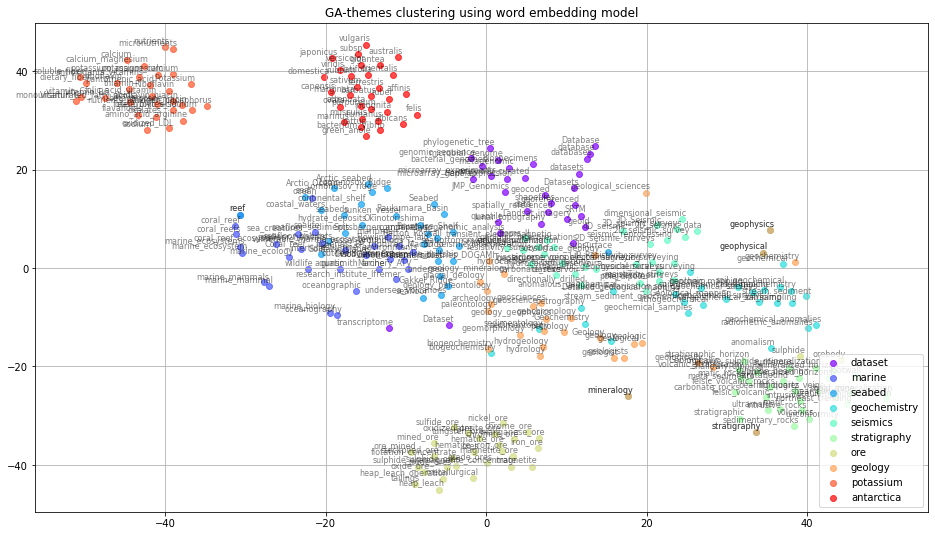

['datasets', 'database', 'data', 'geocoded', 'biospecimens', 'Landsat_imagery', 'SRTM', 'genomic_sequence', 'Datasets', 'HapMap', 'Dataset', 'microbial_genome', 'microarray_gene_expression', 'comparative_genomic_analysis', 'transcriptome', 'geoid', 'quantile', 'JMP_Genomics', 'geologic_interpretations', 'lunar_topography', 'Database', 'microarray_experiments', 'shapefiles', 'phylogenetic_tree', 'bacterial_genomes', 'metagenomic', 'manually_curated', 'spatially_referenced', 'georeferenced', 'databases']
['Marine', 'maritime', 'marine_mammal', 'fisheries', 'WolfCamera.com', 'coral_reef', 'vessel_groundings', 'marine_mammals', 'marine_ecology', 'seafloor_habitats', 'outdoors_Oropeza', 'Solitary_Islands', 'coral_reefs', 'estuarine_environments', 'sealife', 'Coral_reef', 'oceanographic', 'reef', 'marine_ecosystem', 'aquatic', 'research_institute_Ifremer', 'marine_ecosystems', 'coral_reef_ecosystem', 'marine_biology', 'gunsmith_archery_ATV', 'oceanography', 'sea_creatures', 'ocean', 'wildlif

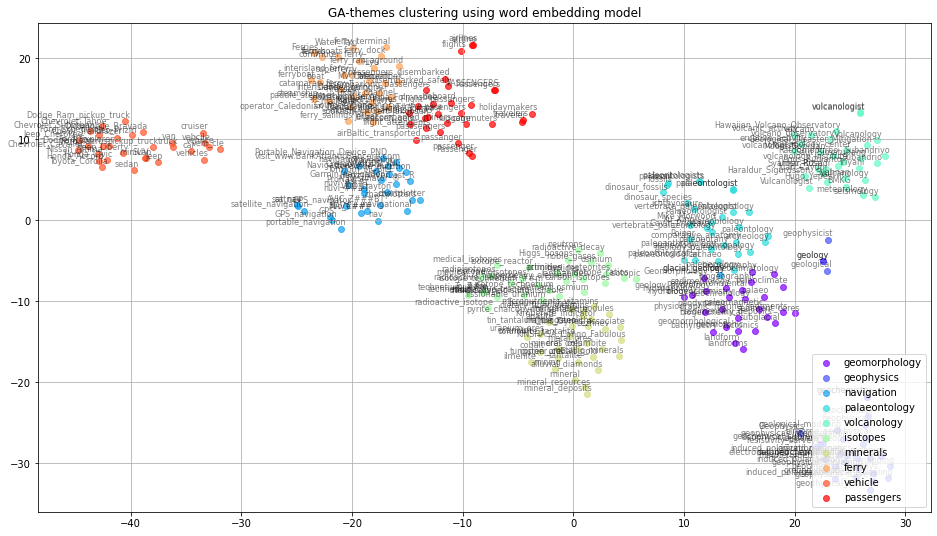

['geomorphic', 'tectonics', 'geology', 'biogeochemistry', 'landforms', 'sedimentology', 'geology_hydrology', 'paleomagnetic', 'geochronology', 'geomorphological', 'palaeo', 'paleoclimatology', 'geodynamic', 'biogeochemical', 'biogeographic', 'hydrogeology', 'sedimentary_deposits', 'geochemistry', 'glacial_geology', 'bathymetry', 'marine_sediments', 'Geomorphology', 'landform', 'physiographic', 'paleoenvironmental', 'hydrology', 'biogeography', 'subglacial', 'sediment_cores', 'paleoclimate']
['geophysical', 'geophysical_surveys', 'geophysical_survey', 'geological_mapping', 'geochemistry', 'geologic_mapping', 'geochemical', 'Geophysics', 'airborne_geophysics', 'detailed_geological_mapping', 'electromagnetic_surveys', 'geology', 'ground_geophysics', 'airborne_geophysical', 'resistivity_surveys', 'soil_geochemical_surveys', 'geochemical_surveys', 'geological', 'induced_polarization_survey', 'induced_polarization_IP', 'geological_modeling', 'ground_magnetics', 'geophysical_surveying', 'geoc

In [25]:
# 1st 30 unique_thematic_concepts as key values to make clusters

for i in range(3):
  if i==0:
    keys = unique_thematic_concept[:10]
  elif i==1:
    keys = unique_thematic_concept[10:20]
  elif i==2:
    keys = unique_thematic_concept[20:30]
  embedding_clusters = []
  word_clusters = []
  for word in keys:
      embeddings = []
      words = []
      for similar_word, _ in GoogleNews_model.most_similar(word, topn=30):
          words.append(similar_word)
          embeddings.append(GoogleNews_model[similar_word])
      embedding_clusters.append(embeddings)
      word_clusters.append(words)

  #import TSNE
  from sklearn.manifold import TSNE
  import numpy as np

  embedding_clusters = np.array(embedding_clusters)
  n, m, k = embedding_clusters.shape
  tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
  embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

  # Script for creating a 2D scatter plot using Matplotlib library for data visualization in Python.
  import matplotlib.pyplot as plt
  import matplotlib.cm as cm
  # matplotlib inline


  def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
      plt.figure(figsize=(16, 9))
      colors = cm.rainbow(np.linspace(0, 1, len(labels)))
      for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
          x = embeddings[:, 0]
          y = embeddings[:, 1]
          plt.scatter(x, y, c=color, alpha=a, label=label)
          for i, word in enumerate(words):
              plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                          textcoords='offset points', ha='right', va='bottom', size=8)
      plt.legend(loc=4)
      plt.title(title)
      plt.grid(True)
      if filename:
          plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
      plt.show()


  tsne_plot_similar_words('GA-themes clustering using word embedding model', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

  for i in range(len(word_clusters)):
   print(word_clusters[i])